## Complex Machine Learning Models - Random Forest

### In this Notebook:

#### 01. Importing Libraries and Data
#### 02. Cleaning, Wrangling, Reshaping and Splitting the Data
#### 03. Create Random Forests
            2000s Data
            1990s Data
#### 04. Discovering Feature Importances
            2000s Data
            1990s Data
#### 05. Modeling the 3 Most Influential Weather Stations and Discovering their Feature Importances
            Budapest
            Madrid
            Belgrade

## 01. Importing Libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from numpy import argmax

In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [4]:
# Set path

path = r'C:\Users\Josh Wattay\anaconda3\ClimateWins Analysis\01 - Data'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path,'weather_data.csv'))

In [6]:
pleasant = pd.read_csv(os.path.join(path, 'pleasant_weather.csv'))

In [7]:
# Check data

df.head(1)

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   

   BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0             0.7              6.5             0.8   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                     0.0                7.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   

   DEBILT_cloud_cover  DEBILT_wind_speed  DEBILT_humidity  DEBILT_pressure  \
0                   7                7.7             0.85           1.0032   

   DEBILT_global_radiation  DEBILT_precipitation  DEBILT_sunshine  \
0                     0.07                  0.25              0.0   

   DEBILT_temp_mean  DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
0               9.3              7.4             11.0                       8   

   DUSSELDORF_wind_speed  DUSSELDORF_humidity  DUSSELDORF_pressure  \
0                    5.4                 0.83               1.0161   

   DUSSELDORF_global_radiation  DUSSELDORF_precipitation  \
0                         0.12                      0.08   

   DUSSELDORF_snow_depth  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
0                      0                  0.0                  10.0   

   DUSSELDORF_temp_min  DUSSELDORF_temp_max  GDANSK_cloud_cover  \
0                  7.0                 11.5                   8   

   GDANSK_humidity  GDANSK_precipitation  GDANSK_snow_depth  GDANSK_temp_mean  \
0             0.91                   0.0                  0               0.8   

   GDANSK_temp_min  GDANSK_temp_max  HEATHROW_cloud_cover  HEATHROW_humidity  \
0             -0.3              1.6                     7               0.91   

   HEATHROW_pressure  HEATHROW_global_radiation  HEATHROW_precipitation  \
0              1.001                       0.13                    0.22   

   HEATHROW_snow_depth  HEATHROW_sunshine  HEATHROW_temp_mean  \
0                    0                0.0                10.6   

   HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_wind_speed  KASSEL_humidity  \
0                9.4                8.3                2.9             0.82   

   KASSEL_pressure  KASSEL_global_radiation  KASSEL_precipitation  \
0           1.0094                     0.28                  0.48   

   KASSEL_sunshine  KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  \
0              1.6               7.9              3.9              9.4   

   LJUBLJANA_cloud_cover  LJUBLJANA_wind_speed  LJUBLJANA_humidity  \
0                      8                   1.4                 1.0   

   LJUBLJANA_pressure  LJUBLJANA_global_radiation  LJUBLJANA_precipitation  \
0              1.0173                         0.2                      0.0   

   LJUBLJANA_sunshine  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  \
0                 0.0                 -0.6                -1.9   

   LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  MAASTRICHT_wind_speed  \
0                 0.5                       7                    8.7   

   MAASTRICHT_humidity  MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
0                 0.83  

In [8]:
pleasant.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   

   VALENTIA_pleasant_weather  
0                          0

In [9]:
#Remove GDANSK, ROMA, and TOURS data as well as snow_depth and wind_speed

df = df.drop(columns=[col for col in df.columns if any(keyword.lower() in col.lower() for keyword in ['GDANSK', 'ROMA', 'TOURS', 'snow_depth', 'wind_speed'])])

In [10]:
# Check data

df.head(1)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                     0.0                7.0                 3.7   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   

   DEBILT_sunshine  DEBILT_temp_mean  DEBILT_temp_min  DEBILT_temp_max  \
0              0.0               9.3              7.4             11.0   

   DUSSELDORF_cloud_cover  DUSSELDORF_humidity  DUSSELDORF_pressure  \
0                       8                 0.83               1.0161   

   DUSSELDORF_global_radiation  DUSSELDORF_precipitation  DUSSELDORF_sunshine  \
0                         0.12                      0.08                  0.0   

   DUSSELDORF_temp_mean  DUSSELDORF_temp_min  DUSSELDORF_temp_max  \
0                  10.0                  7.0                 11.5   

   HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0                     7               0.91              1.001   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_sunshine  \
0                       0.13                    0.22                0.0   

   HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_humidity  \
0                10.6                9.4                8.3             0.82   

   KASSEL_pressure  KASSEL_global_radiation  KASSEL_precipitation  \
0           1.0094                     0.28                  0.48   

   KASSEL_sunshine  KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  \
0              1.6               7.9              3.9              9.4   

   LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
0                      8                 1.0              1.0173   

   LJUBLJANA_global_radiation  LJUBLJANA_precipitation  LJUBLJANA_sunshine  \
0                         0.2                      0.0                 0.0   

   LJUBLJANA_temp_mean  LJUBLJANA_temp_min  LJUBLJANA_temp_max  \
0                 -0.6                -1.9                 0.5   

   MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                       7                 0.83               1.0063   

   MAASTRICHT_global_radiation  MAASTRICHT_precipitation  MAASTRICHT_sunshine  \
0                         0.22                      0.32                  1.0   

   MAASTRICHT_temp_mean  MAASTRICHT_temp_min  MAASTRICHT_temp_max  \
0                   9.5                  8.5                 11.1   

   MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                   6             0.92            1.026   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  MUNCHENB_cloud_cover  \
0               7.6              4.4             10.8

In [11]:
# Check shape

df.shape

(22950, 134)

In [12]:
# Check shape

pleasant.shape

(22950, 16)

## 02. Cleaning, Wrangling, Reshaping and Splitting the Data

**Wrangling for Random Forest 1 (2000s Weather Data)**

In [13]:
# Filter weather dataset to 2000s
df_2000s = df[df['DATE'].astype(str).str.startswith('200')] 
df_2000s.head(1)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610  20000101      1                  8            0.89          1.0286   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                     0.2                 0.03             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
14610              2.9             1.6             3.9                     7   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
14610               0.88             1.0275                       0.24   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
14610                     0.0                0.0                -2.5   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
14610               -3.2               -0.4                     3   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
14610               0.92             1.0268                       0.52   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
14610                     0.0                3.7                -4.9   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
14610               -8.4               -0.7                   7   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
14610             0.97            1.024                     0.14   

       DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
14610                   0.1              0.0               6.1   

       DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
14610              3.5              8.1                       8   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
14610                 0.92                1.024                         0.12   

       DUSSELDORF_precipitation  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
14610                      0.22                  0.0                   4.2   

       DUSSELDORF_temp_min  DUSSELDORF_temp_max  HEATHROW_cloud_cover  \
14610                  2.5                  6.9                     7   

       HEATHROW_humidity  HEATHROW_pressure  HEATHROW_global_radiation  \
14610               0.94             1.0245                       0.18   

       HEATHROW_precipitation  HEATHROW_sunshine  HEATHROW_temp_mean  \
14610                     0.0                0.4                 7.0   

       HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_humidity  KASSEL_pressure  \
14610                4.9               10.8             0.93           1.0237   

       KASSEL_global_radiation  KASSEL_precipitation  KASSEL_sunshine  \
14610                     0.12                  0.13              0.0   

       KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  \
14610               3.5              1.5              5.0   

       LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
14610                      6                0.83              1.0294   

       LJUBLJANA_global_radiation  LJUBLJANA_precipitation  \
14610                        0.57                      0.0   

       LJUBLJANA_sunshine  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  \
14610                 5.2                 -4.8                -9.1   

       LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  MAASTRICHT_humidity  \
14610                -1.3                       8                 0.98   

       MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
14610               1.0251                         0.12   

       MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
14610                      0.17                  0.0                   5.6   

       MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
14610                  4.1                  6.9                   1   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
14610              0.8           1.0282         

In [14]:
# Check shape
df_2000s.shape

(3653, 134)

In [15]:
# Filter pleasant dataset to 2000s
pleasant_2000s = pleasant[pleasant['DATE'].astype(str).str.startswith('200')] 
pleasant_2000s.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610  20000101                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
14610                           0                           0   

       VALENTIA_pleasant_weather  
14610                          0

In [16]:
# Check shape
pleasant_2000s.shape

(3653, 16)

In [17]:
# Drop 'DATE' and 'MONTH' columns from 2000s weather dataset
df_2000s_2 = df_2000s.drop(columns=['DATE', 'MONTH'])

# Check shape
df_2000s_2.shape

(3653, 132)

In [18]:
# Drop 'DATE' column from 2000s pleasant dataset
pleasant_2000s_2 = pleasant_2000s.drop(columns=['DATE'])

# Check shape
pleasant_2000s_2.shape

(3653, 15)

In [19]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_1 = pleasant_2000s_2.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3653,)


In [20]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [21]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [22]:
# Check shape
y_1.shape

(3653,)

In [23]:
# Create X matrix
X_1 = df_2000s_2.to_numpy()

In [24]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3653, 132)
(3653,)


In [25]:
# Split data into training and testing sets

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=843)

In [26]:
# Check shapes
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(2739, 132) (2739,)
(914, 132) (914,)


**Wrangling for Random Forest 2 (1990s Weather Data)**

In [27]:
# Filter weather dataset to 1990s
df_1990s = df[df['DATE'].astype(str).str.startswith('199')] 
df_1990s.head(1)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958  19900101      1                  0            0.83          1.0217   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                     0.6                  0.0             7.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
10958               0.86             1.0246                       0.19   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
10958                     0.0                5.3                -1.3   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
10958               -5.3                3.7                     8   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
10958                0.8             1.0263                       0.18   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
10958                     0.0                0.0                 0.1   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
10958               -0.8                0.6                   8   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
10958              0.9           1.0198                      0.1   

       DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
10958                   0.0              0.0               0.5   

       DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
10958              0.0              1.2                       8   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
10958                 0.93               1.0196                         0.12   

       DUSSELDORF_precipitation  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
10958                      0.03                  0.0                   0.6   

       DUSSELDORF_temp_min  DUSSELDORF_temp_max  HEATHROW_cloud_cover  \
10958                  0.0                  1.0                     8   

       HEATHROW_humidity  HEATHROW_pressure  HEATHROW_global_radiation  \
10958               0.92              1.016                       0.13   

       HEATHROW_precipitation  HEATHROW_sunshine  HEATHROW_temp_mean  \
10958                    0.15                0.0                 4.5   

       HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_humidity  KASSEL_pressure  \
10958                2.6                9.9             0.94           1.0205   

       KASSEL_global_radiation  KASSEL_precipitation  KASSEL_sunshine  \
10958                     0.12                   0.0              0.0   

       KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  \
10958              -1.3             -1.5             -0.7   

       LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
10958                      8                 0.8              1.0217   

       LJUBLJANA_global_radiation  LJUBLJANA_precipitation  \
10958                        0.14                      0.0   

       LJUBLJANA_sunshine  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  \
10958                 0.0                 -1.5                -2.0   

       LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  MAASTRICHT_humidity  \
10958                -0.6                       8                 0.96   

       MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
10958               1.0197                         0.12   

       MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
10958                       0.0                  0.0                   0.5   

       MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
10958                  0.1                  0.8                   8   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
10958             0.96           1.0215         

In [28]:
# Check shape
df_1990s.shape

(3652, 134)

In [29]:
# Filter pleasant dataset to 1990s
pleasant_1990s = pleasant[pleasant['DATE'].astype(str).str.startswith('199')] 
pleasant_1990s.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958  19900101                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
10958                           0                           0   

       VALENTIA_pleasant_weather  
10958                          0

In [30]:
# Check shape
pleasant_1990s.shape

(3652, 16)

In [31]:
# Drop 'DATE' and 'MONTH' columns from 1990s weather dataset
df_1990s_2 = df_1990s.drop(columns=['DATE', 'MONTH'])

# Check shape
df_1990s_2.shape

(3652, 132)

In [32]:
# Drop 'DATE' column from 1990s pleasant dataset
pleasant_1990s_2 = pleasant_2000s.drop(columns=['DATE'])

# Check shape
pleasant_2000s_2.shape

(3653, 15)

In [33]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_2 = pleasant_2000s_2.max(axis=1)
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (3653,)


In [34]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_2_combined:", y_2.unique())

Unique values in y_2_combined: [0 1]


In [35]:
# Ensure y has the correct shape
y_2 = y_2.to_numpy().reshape(-1)

In [36]:
# Check shape
y_2.shape

(3653,)

In [37]:
# Create X matrix
X_2 = df_2000s_2.to_numpy()

In [38]:
# Check shapes
print(X_2.shape)
print(y_2.shape)

(3653, 132)
(3653,)


In [39]:
# Split data into training and testing sets

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=843)

In [40]:
# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(2739, 132) (2739,)
(914, 132) (914,)


## 03. Create Random Forests

**Random Forest 1 (2000s Data)**

In [41]:
# Creating a Random Forest classifier
clf_1 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=10)

In [42]:
# Perform the predictions on the test dataset
y_pred_1 = clf_1.predict(X_test_1)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  0.9551422319474836


In [43]:
# Check unique values in y
unique_classes = np.unique(y_1)
print(unique_classes)
print(len(unique_classes)) 

[0 1]
2


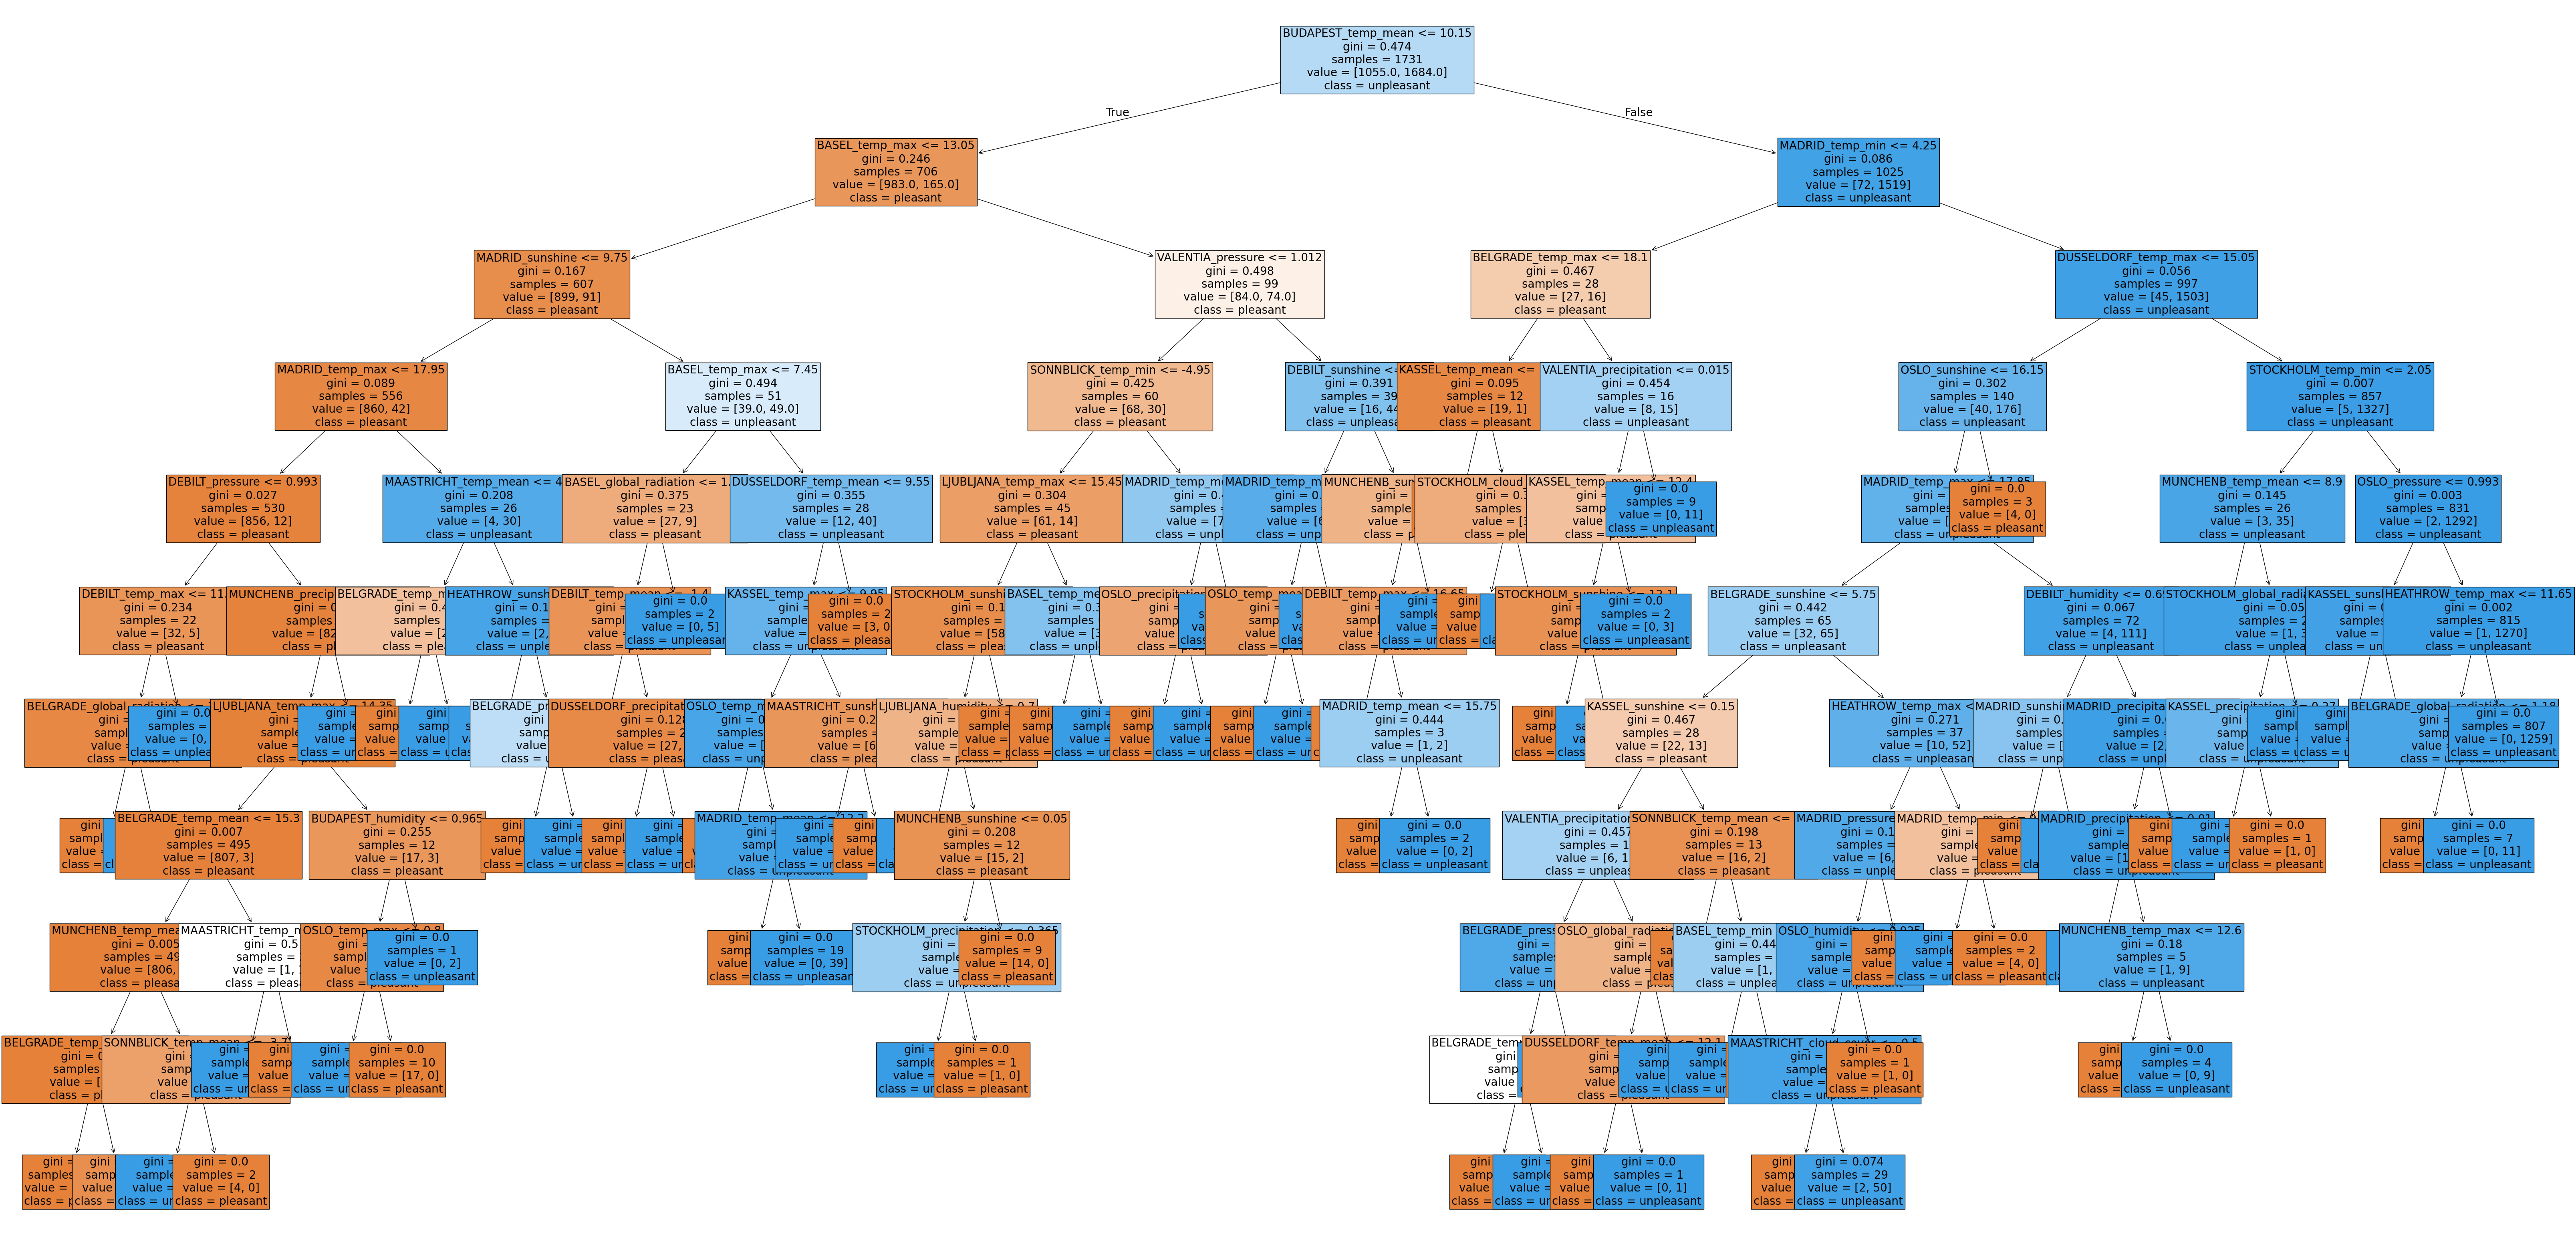

In [44]:
# Plot random forest 1 (2000s Data) - estimator 3
rf_1 = plt.figure(figsize=(80,40))
plot_tree(clf_1.estimators_[3], fontsize = 20, feature_names=df_2000s_2.columns, class_names=['pleasant', 'unpleasant'], filled=True)
plt.show();

In [45]:
rf_1.savefig(os.path.join(path,'random_forest_2000s.png'),bbox_inches='tight')

**Random Forest 2 (1990s Data)**

In [46]:
# Creating a Random Forest classifier
clf_2 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=10)

In [47]:
# Perform the predictions on the test dataset
y_pred_2 = clf_2.predict(X_test_2)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  0.9584245076586433


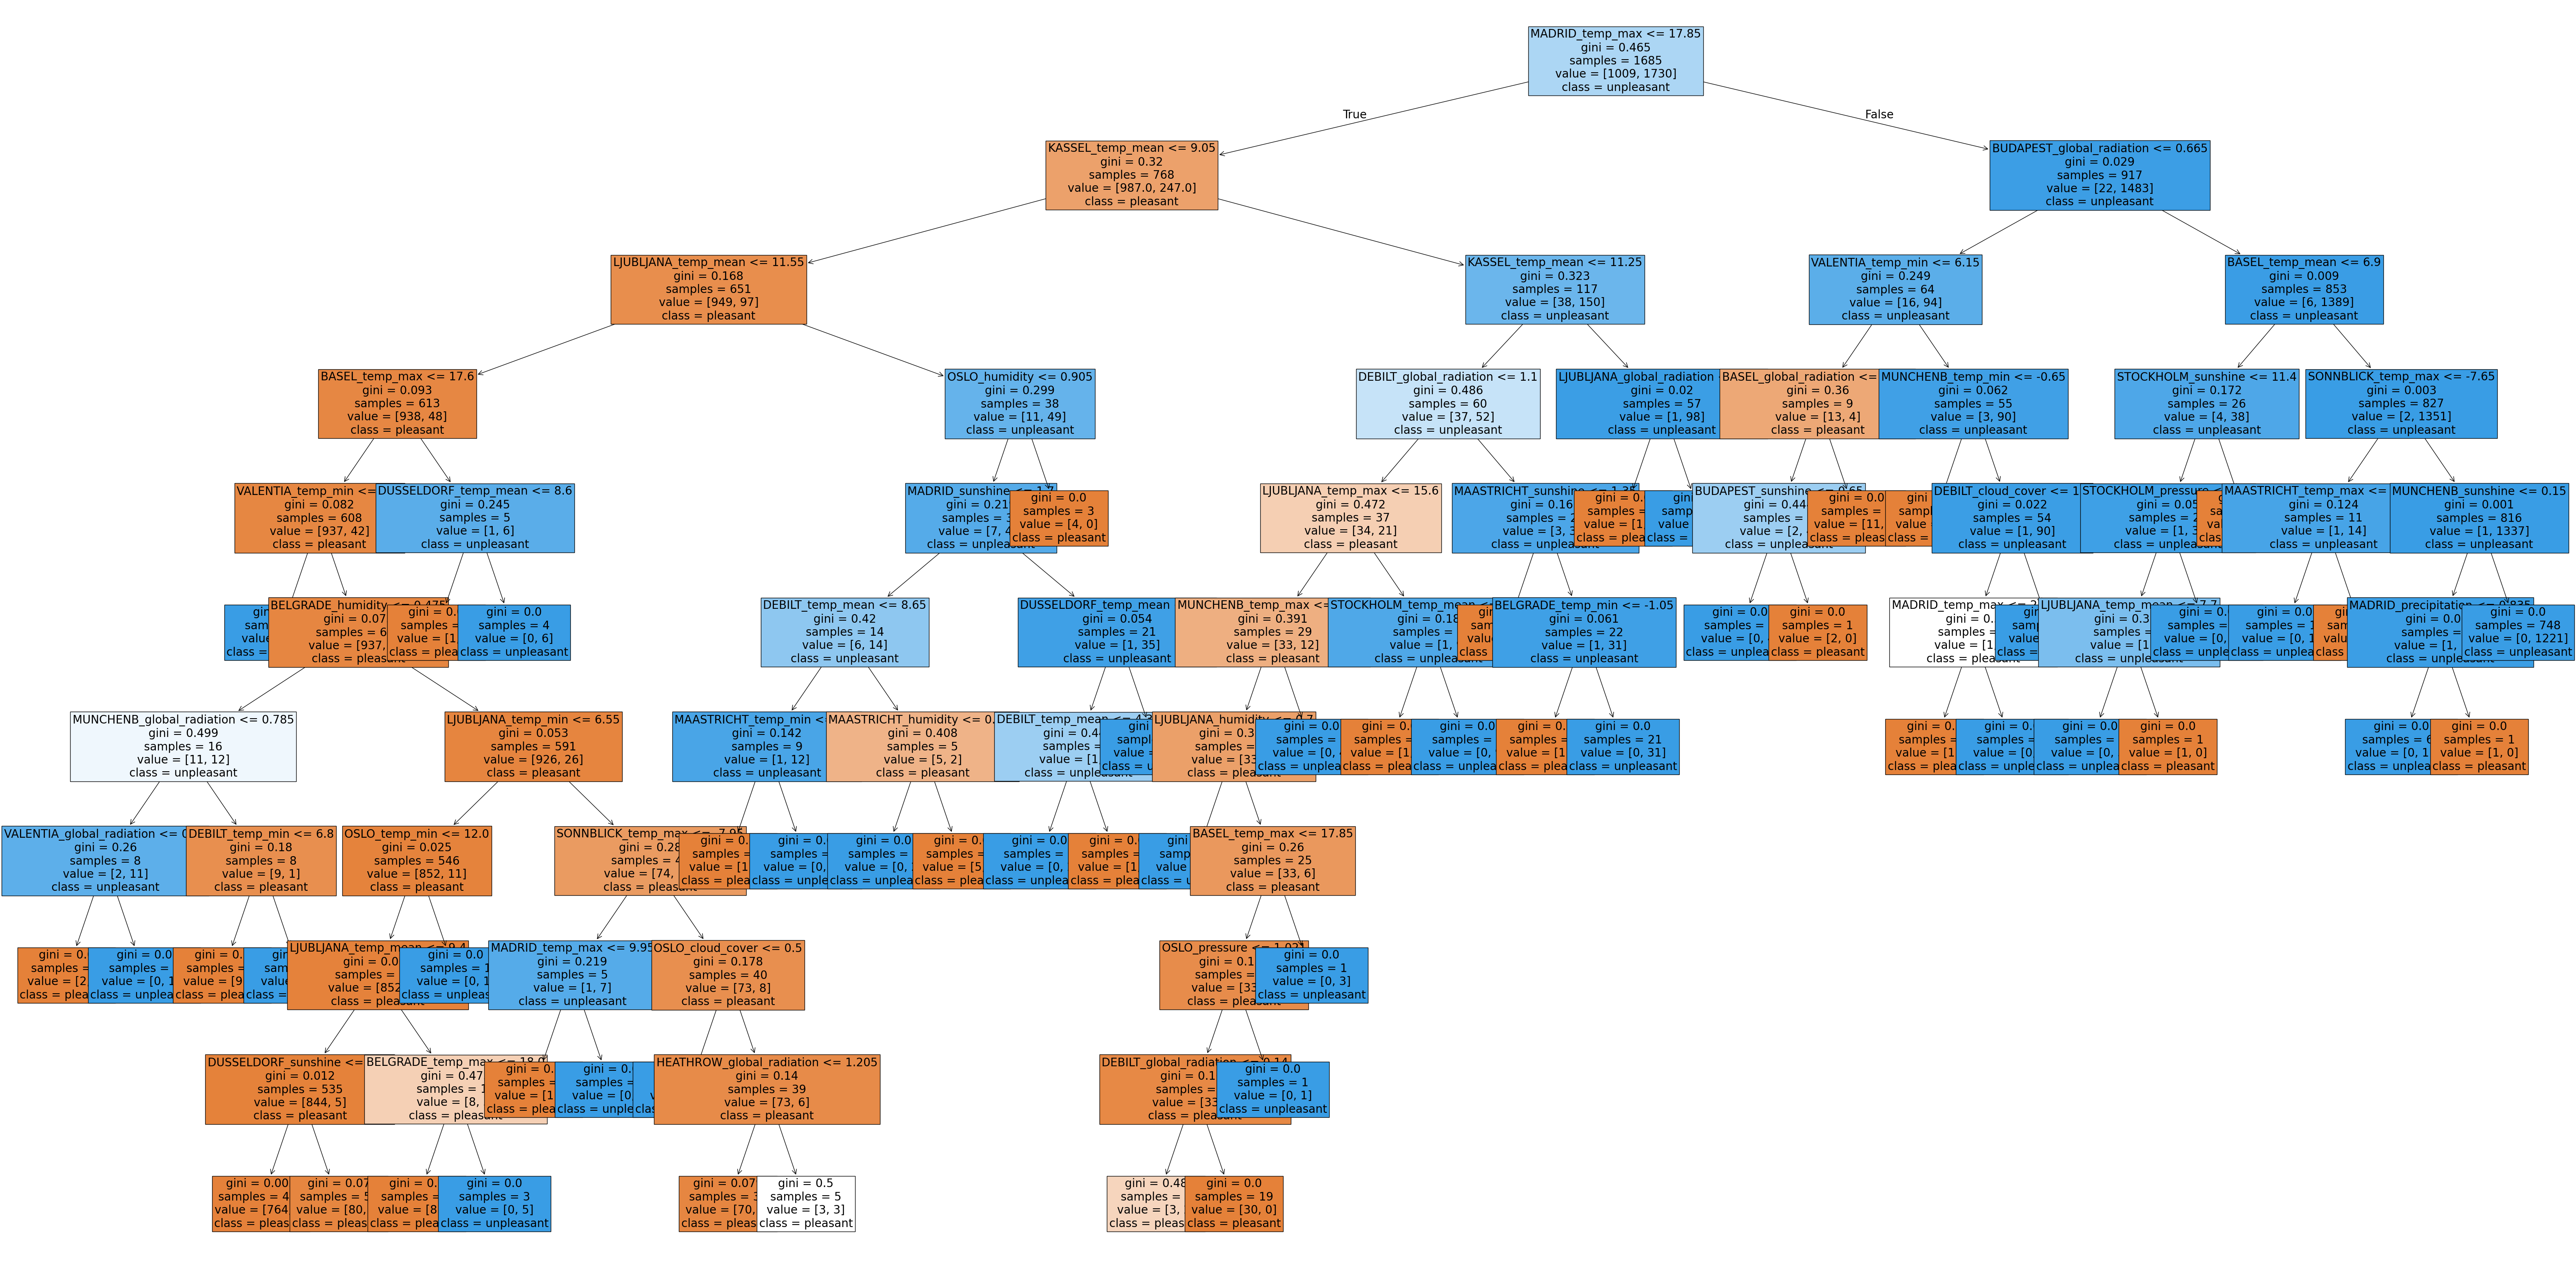

In [48]:
# Plot random forest (1990s) - estimator 7
rf_2 = plt.figure(figsize=(80,40))
plot_tree(clf_2.estimators_[7], fontsize = 20, feature_names=df_1990s_2.columns, class_names=['pleasant', 'unpleasant'], filled=True)
plt.show();

In [49]:
rf_2.savefig(os.path.join(path,'random_forest_1990s.png'),bbox_inches='tight')

## 04. Discovering Feature Importances

**2000s Data**

In [50]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [0.00050057 0.00153188 0.00108015 0.0027358  0.00056905 0.00076459
 0.02322411 0.00246117 0.04139023 0.0008937  0.00359062 0.00125838
 0.00401612 0.00228231 0.00240619 0.02760932 0.00863816 0.01865644
 0.00079495 0.00113403 0.00141521 0.00525513 0.0008204  0.00213523
 0.07970636 0.03560999 0.08807552 0.00060745 0.00077836 0.00086329
 0.00265128 0.00056266 0.00154926 0.0074146  0.00165707 0.0037913
 0.00064105 0.00132272 0.00069155 0.00302975 0.00094739 0.00082109
 0.00720969 0.00094637 0.01972247 0.00048592 0.00070599 0.00134338
 0.00251321 0.00070805 0.00079163 0.01249704 0.00123452 0.00478419
 0.00092442 0.00141035 0.00707719 0.00048499 0.00120343 0.02953493
 0.00212794 0.03042436 0.00045221 0.00139034 0.00188195 0.00315491
 0.00090041 0.00167171 0.06388738 0.00745701 0.05637398 0.0004144
 0.00093307 0.00120989 0.00313708 0.00077602 0.00078827 0.00737863
 0.00133288 0.0149076  0.00134043 0.00399565 0.00294028 0.01277257
 0.00256449 0.00474851 0.05357341 0.0142934

In [51]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

ValueError: cannot reshape array of size 132 into shape (15,9)

In [52]:
# Calculate the mean of the array
mean_value = np.mean(feature_importances_1)

# Pad the array with 3 elements, each equal to the mean value
padded_importances = np.pad(feature_importances_1, (0, 3), 'constant', constant_values=mean_value)

# Now reshape to (15, 9)
reshaped_importances_1 = padded_importances.reshape(15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (15, 9)


In [55]:
# Sum the values across the last dimension (axis=1) to get one observation for each row (weather station)
collapsed_importances_1 = np.sum(reshaped_importances_1, axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.07425755 0.06935124 0.21494683 0.01987526 0.03533208 0.02506394
 0.07363982 0.13713209 0.03180387 0.19385316 0.04830941 0.03372019
 0.01394529 0.01777889 0.03371767]


In [56]:
# Check shape of reshaped_importances_1[0]

print("Shape of reshaped_importances_1[0]:", reshaped_importances_1[0].shape)

Shape of reshaped_importances_1[0]: (9,)


In [57]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [58]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [59]:
# Sort by importance for chart readability
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
2         BUDAPEST    0.214947
9           MADRID    0.193853
7        LJUBLJANA    0.137132
0            BASEL    0.074258
6           KASSEL    0.073640
1         BELGRADE    0.069351
10        MUNCHENB    0.048309
4       DUSSELDORF    0.035332
11            OSLO    0.033720
14        VALENTIA    0.033718
8       MAASTRICHT    0.031804
5         HEATHROW    0.025064
3           DEBILT    0.019875
13       STOCKHOLM    0.017779
12       SONNBLICK    0.013945


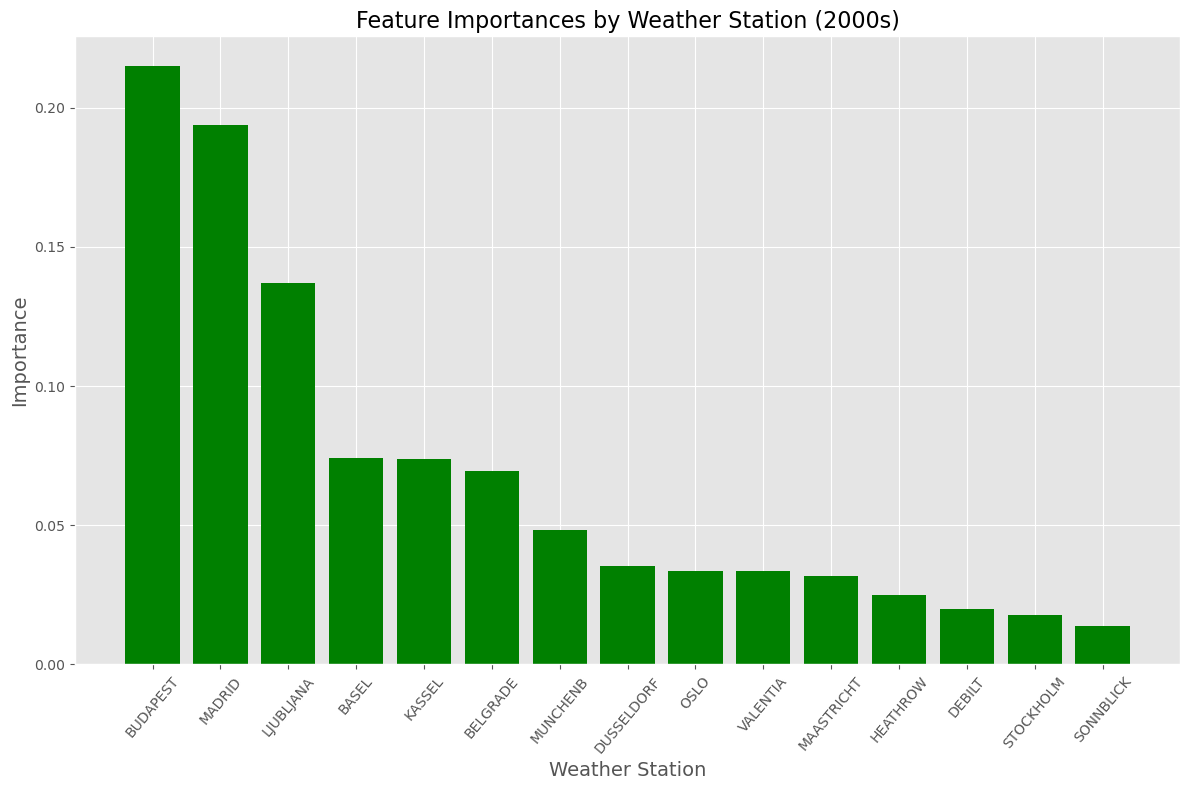

In [60]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='green')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2000s)', fontsize=16)
plt.tight_layout()
plt.show()

In [61]:
plt_1.savefig(os.path.join(path, 'feature_importances_2000s.png'),bbox_inches='tight')

**1990s Data**

In [62]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf_2.feature_importances_
print("Feature Importances:", feature_importances_2)

Feature Importances: [0.00068671 0.00108341 0.00126027 0.00290078 0.00068177 0.00095971
 0.02312013 0.00268415 0.01179637 0.0006648  0.00279515 0.00157684
 0.00362044 0.00308539 0.00133717 0.03297808 0.02744072 0.0447038
 0.00055832 0.00105669 0.00130273 0.00498982 0.00095852 0.0017463
 0.09183326 0.01091271 0.07778464 0.00041521 0.00110857 0.00105998
 0.0047672  0.00056576 0.00077695 0.00331571 0.00604466 0.02580186
 0.00052878 0.00110668 0.0014194  0.00355995 0.00069916 0.00067504
 0.00222139 0.00142857 0.0212166  0.00041367 0.00058998 0.00119713
 0.00480771 0.00049197 0.00063595 0.00755049 0.0025072  0.00854835
 0.0010197  0.0016149  0.00262586 0.00065814 0.00095257 0.0123696
 0.00160243 0.00395577 0.00035786 0.00200295 0.00139155 0.00721482
 0.0007587  0.00110697 0.03436731 0.00225813 0.06283625 0.00033151
 0.00123086 0.00130083 0.00208321 0.00095465 0.0009259  0.01431185
 0.00130292 0.03809286 0.00104524 0.00314721 0.00309232 0.0086878
 0.00273121 0.00358531 0.07103486 0.01661215 

In [63]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_2 = feature_importances_2.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_2.shape)

ValueError: cannot reshape array of size 132 into shape (15,9)

In [64]:
# Step 1: Calculate the mean of the array
mean_value = np.mean(feature_importances_2)

# Step 2: Calculate the remainder to determine padding
total_elements = feature_importances_2.size
remainder = 135 - (total_elements % 135) if total_elements % 135 != 0 else 0

# Step 3: Pad the array with mean values to make it a multiple of 135
padded_importances = np.pad(feature_importances_2, (0, remainder), 'constant', constant_values=mean_value)

# Step 4: Reshape the padded array to (-1, 15, 9)
reshaped_importances_2 = padded_importances.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_2.shape)

Reshaped Importances Shape: (1, 15, 9)


In [65]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_2 = np.sum(reshaped_importances_2[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_2.shape)
print("Collapsed Importances:", collapsed_importances_2)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.04517331 0.1182024  0.19114299 0.04385589 0.03285556 0.02674245
 0.02515684 0.11226818 0.06124831 0.19858867 0.0704349  0.02318225
 0.01159509 0.02307877 0.03920167]


In [66]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_2 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2
})

In [67]:
# Sort by importance for chart readability
collapsed_importances_df_2 = collapsed_importances_df_2.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_2)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.198589
2         BUDAPEST    0.191143
1         BELGRADE    0.118202
7        LJUBLJANA    0.112268
10        MUNCHENB    0.070435
8       MAASTRICHT    0.061248
0            BASEL    0.045173
3           DEBILT    0.043856
14        VALENTIA    0.039202
4       DUSSELDORF    0.032856
5         HEATHROW    0.026742
6           KASSEL    0.025157
11            OSLO    0.023182
13       STOCKHOLM    0.023079
12       SONNBLICK    0.011595


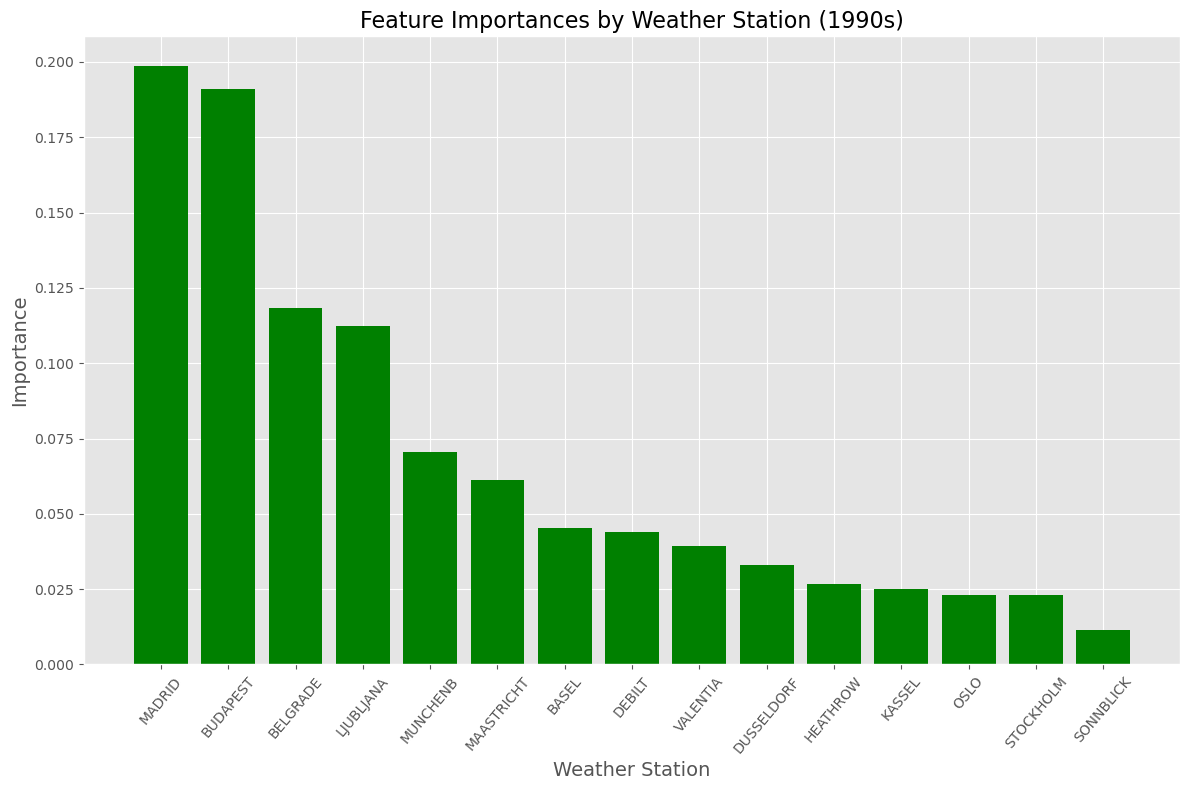

In [68]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_2['Weather Station'], collapsed_importances_df_2['Importance'], color='green')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (1990s)', fontsize=16)
plt.tight_layout()
plt.show()

In [69]:
plt_2.savefig(os.path.join(path, 'feature_importances_2000s.png'),bbox_inches='tight')

## 05. Modeling the 3 Most Influential Weather Stations and Discovering their Feature Importances

### **Madrid**

**Wrangling the Data for Madrid**

In [71]:
# Filter weather dataset to only include Madrid
df_mad = df[df.columns[df.columns.astype(str).str.startswith('MADRID')]]

# Check output
df_mad.head(1)

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                   6             0.92            1.026   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0               7.6              4.4             10.8

In [72]:
# Filter pleasant dataset to only include Madrid
mad_pleasant = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('MADRID')]]

# Check output
mad_pleasant.head(1)

MADRID_pleasant_weather
0                        0

In [73]:
# Check shape
print(df_mad.shape)
print(mad_pleasant.shape)

(22950, 9)
(22950, 1)


In [74]:
# Create matrices
y_3 = mad_pleasant.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (22950,)


In [75]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [76]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(22950,)


In [77]:
# Create X matrix
X_3 = df_mad.to_numpy()

# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(22950, 9)
(22950,)


In [78]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=843)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


**Create Random Forest for Madrid**

In [79]:
# Creating a Random Forest classifier
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3)

In [80]:
# Perform the predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  0.996514464970373


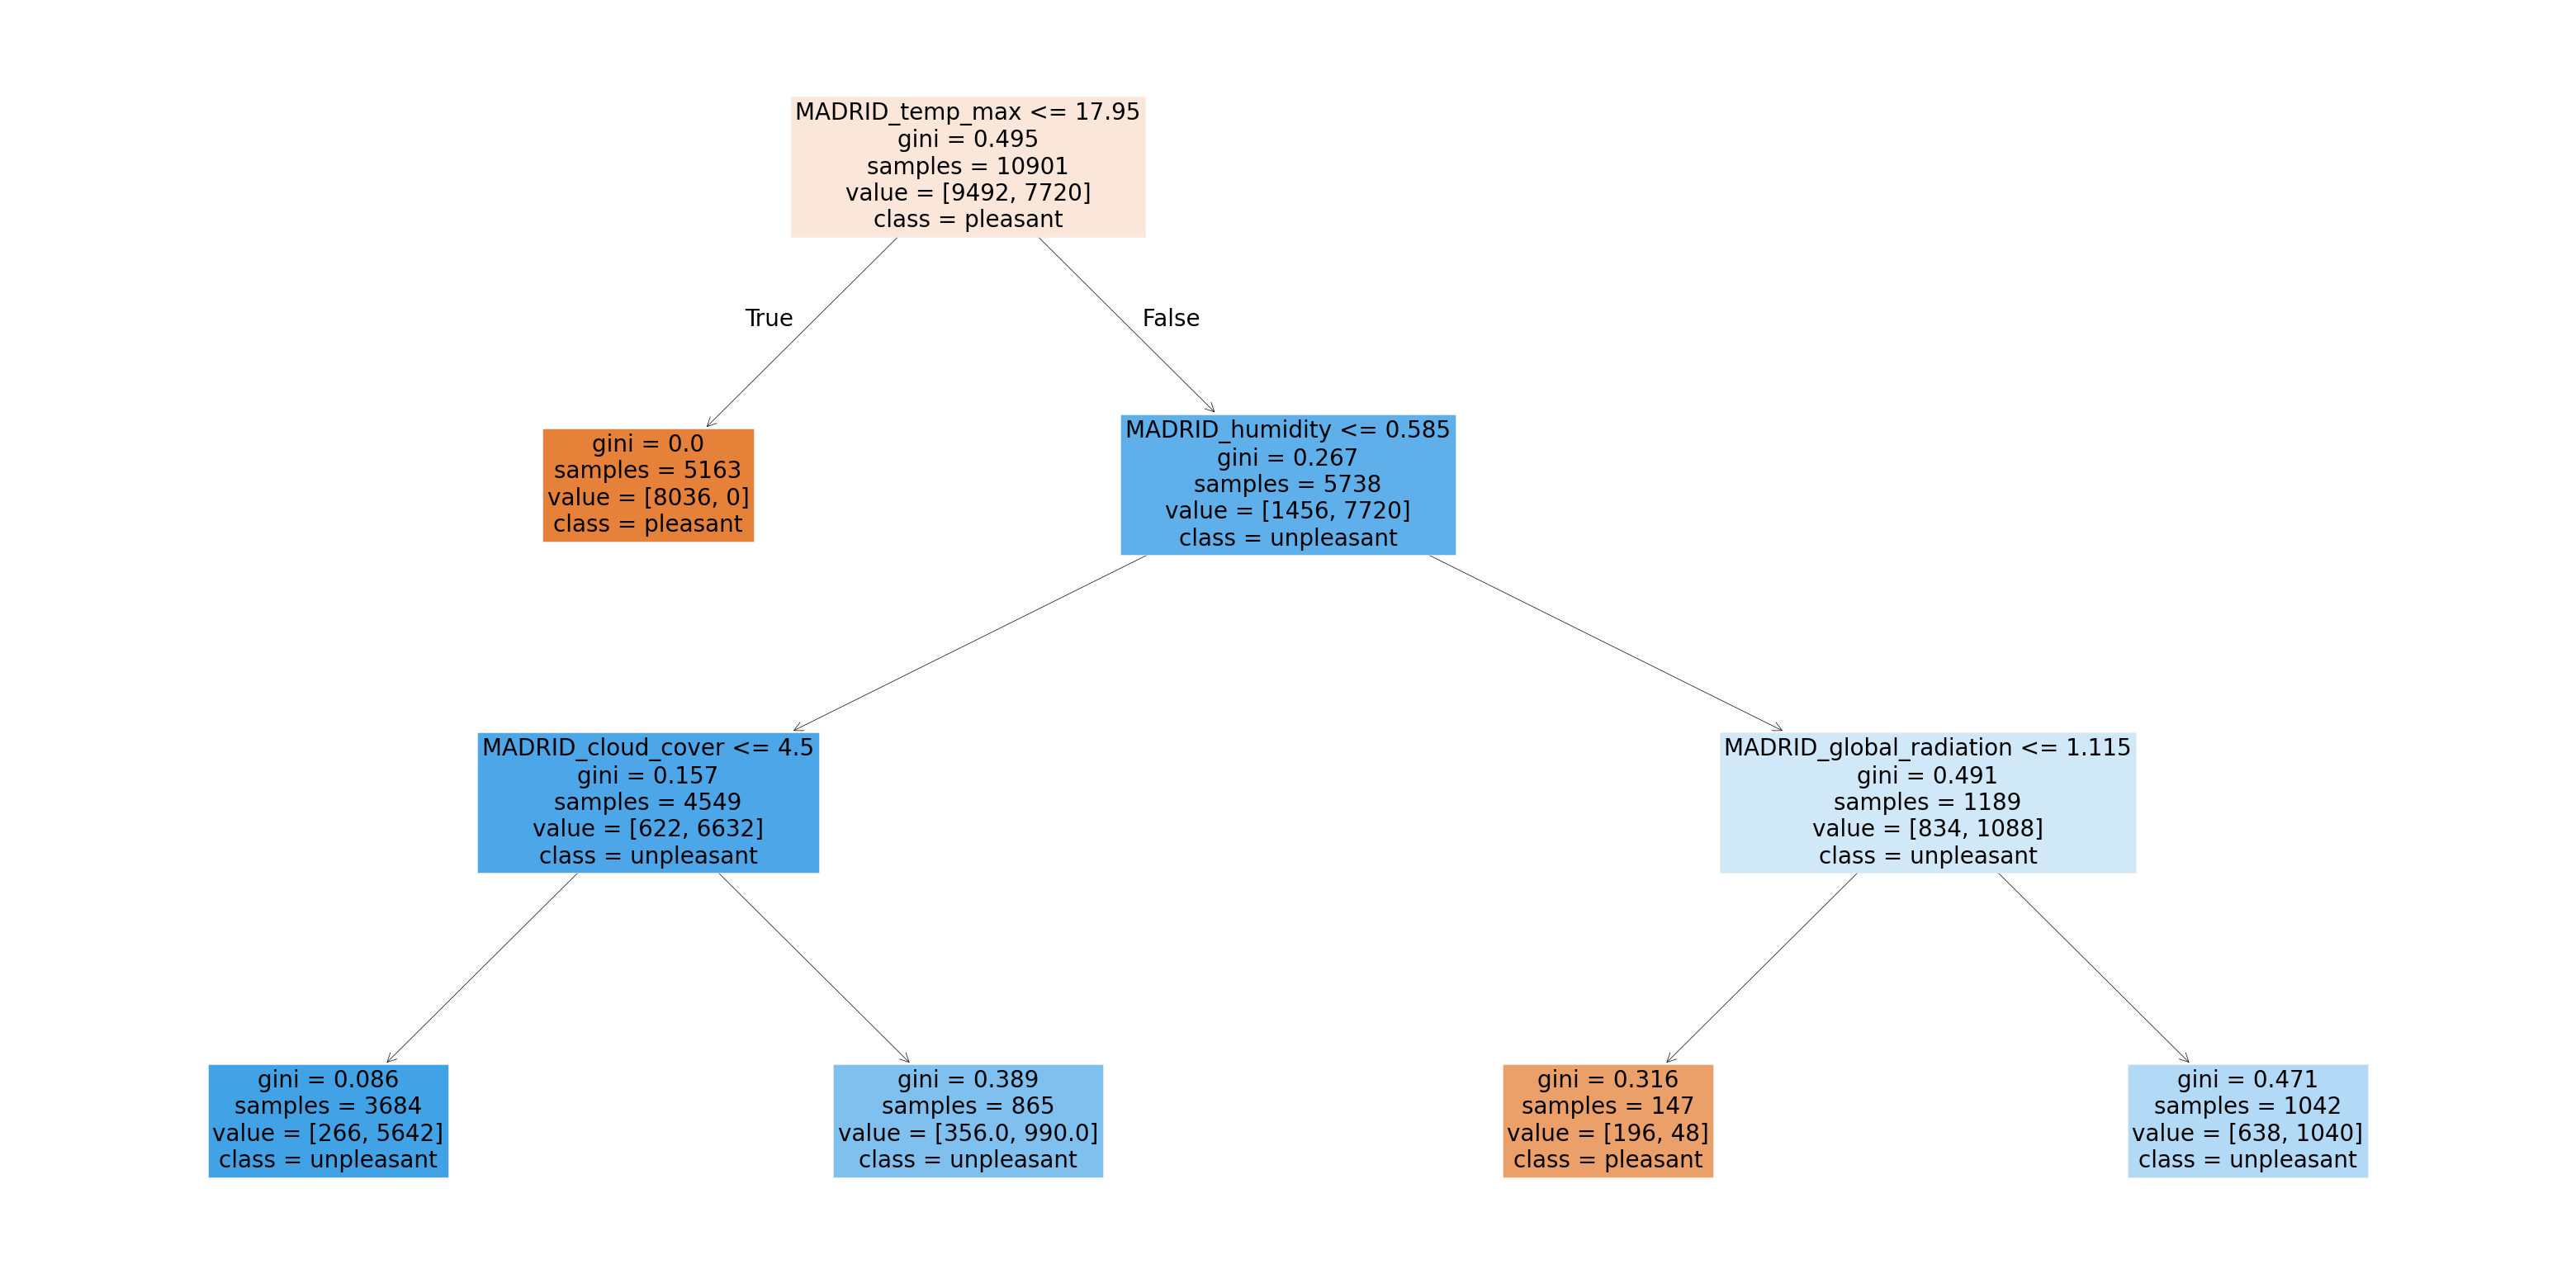

In [81]:
# Plot random forest (Madrid) - estimator 4
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[4], fontsize = 20, feature_names=df_mad.columns, class_names=['pleasant', 'unpleasant'], filled=True)
plt.show();

In [82]:
# Export the plot
rf_3.savefig(os.path.join(path, 'random_forest_madrid.png'),bbox_inches='tight')

**Listing Feature Importances**

In [83]:
# Retrieve feature importances from the trained model
feature_importances_3 = clf_3.feature_importances_
print("Feature Importances:", feature_importances_3)
print(feature_importances_3.shape)

Feature Importances: [0.01548228 0.0337216  0.00088044 0.07783906 0.15293834 0.08720602
 0.24267856 0.05422859 0.33502512]
(9,)


In [84]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [85]:
# Create a dataframe to associate observation measurements with their importances
importances_df_3 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_3
})

In [86]:
# Sort by importance for chart readability
importances_df_3 = importances_df_3.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_3)

Feature Importance:
        Measurement  Importance
8          temp_max    0.335025
6         temp_mean    0.242679
4     precipitation    0.152938
5          sunshine    0.087206
3  global_radiation    0.077839
7          temp_min    0.054229
1          humidity    0.033722
0       cloud_cover    0.015482
2          pressure    0.000880


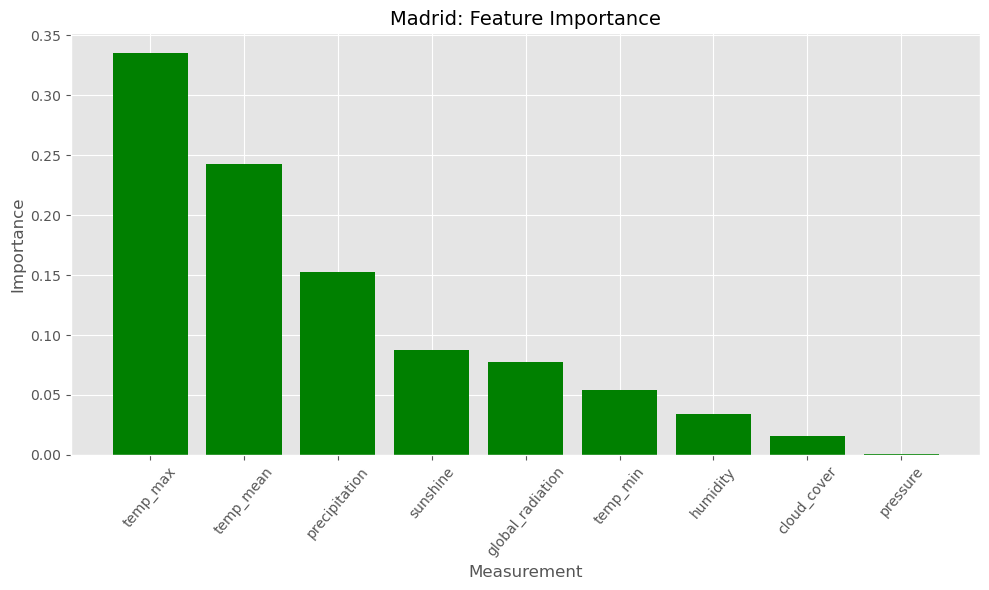

In [87]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_3['Measurement'], importances_df_3['Importance'], color='green')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Feature Importance", fontsize=14)
plt.tight_layout()
plt.show()

In [120]:
# Export Plot
plt_3.savefig(os.path.join(path, 'feature_importances_Madrid.png'),bbox_inches='tight')

> The most important indicators for **Madrid** are: **'temp_max', 'temp_mean', and 'precipitation'.**

### **Budapest**

**Wrangling the Data for Budapest**

In [88]:
# Filter weather dataset to only include Budapest
df_bud = df[df.columns[df.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
df_bud.head(1)

BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  
0                 2.4               -0.4                5.1

In [89]:
# Filter pleasant dataset to only include Budapest
bud_pleasant = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
bud_pleasant.head(1)

BUDAPEST_pleasant_weather
0                          0

In [90]:
# Check shape
print(df_bud.shape)
print(bud_pleasant.shape)

(22950, 9)
(22950, 1)


In [91]:
# Create matrices
y_4 = bud_pleasant.max(axis=1)

# Check shape
print("Shape of y_4_combined:", y_4.shape)

Shape of y_4_combined: (22950,)


In [92]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_4_combined:", y_4.unique())

Unique values in y_4_combined: [0 1]


In [93]:
# Ensure y has the correct shape
y_4 = y_4.to_numpy().reshape(-1)

# Check shape
print(y_4.shape)

(22950,)


In [94]:
# Create X matrix
X_4 = df_bud.to_numpy()

# Check shapes of the matrices
print(X_4.shape)
print(y_4.shape)

(22950, 9)
(22950,)


In [95]:
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=843)

# Check shapes
print(X_train_4.shape, y_train_4.shape)
print(X_test_4.shape, y_test_4.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


**Creating a Random Forest for Budapest**

In [96]:
# Creating a Random Forest classifier
clf_4 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_4.fit(X_train_4, y_train_4)

RandomForestClassifier(max_depth=3)

In [97]:
# Perform the predictions on the test dataset
y_pred_4 = clf_4.predict(X_test_4)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_4, y_pred_4))

Model Accuracy:  0.9973858487277797


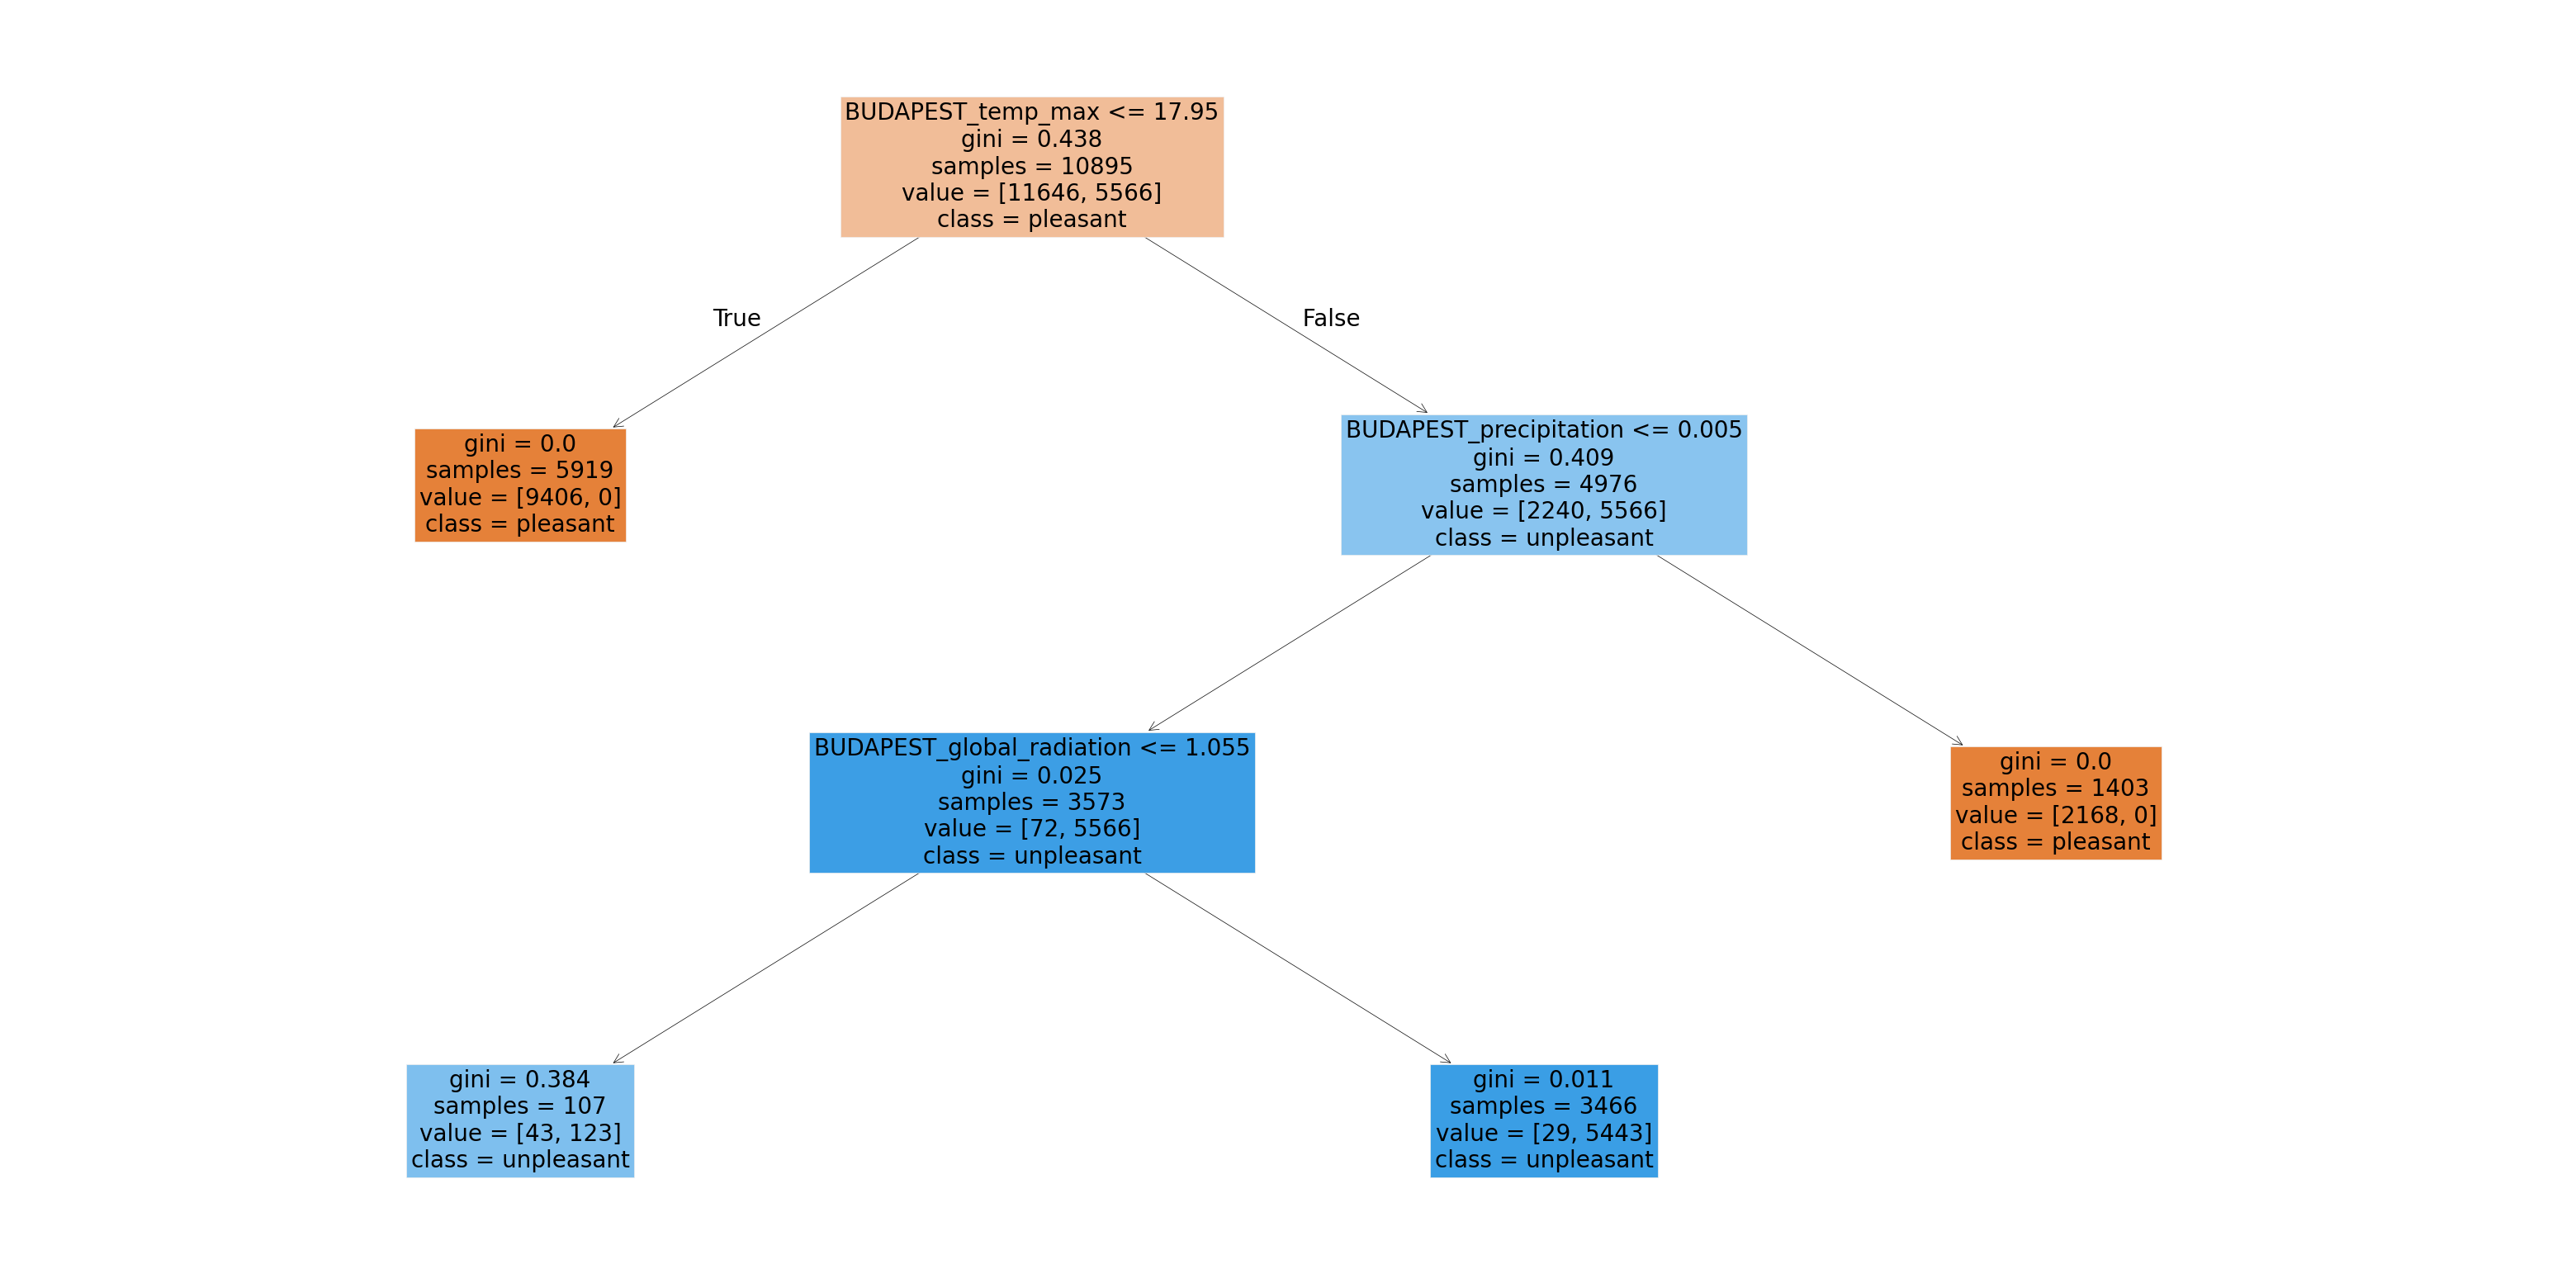

In [98]:
# Plot random forest (Budapest) - estimator 6
rf_4 = plt.figure(figsize=(40,20))
plot_tree(clf_4.estimators_[6], fontsize = 20, feature_names=df_bud.columns, class_names=['pleasant', 'unpleasant'], filled=True)
plt.show();

In [99]:
rf_4.savefig(os.path.join(path, 'random_forest_budapest.png'),bbox_inches='tight')

**Listing Feature Importances**

In [100]:
# Retrieve feature importances from the trained model
feature_importances_4 = clf_4.feature_importances_
print("Feature Importances:", feature_importances_4)
print(feature_importances_4.shape)

Feature Importances: [0.01535926 0.0061478  0.00168838 0.04747169 0.21016267 0.0560567
 0.2261453  0.07847235 0.35849585]
(9,)


In [101]:
# Create a dataframe to associate observation measurements with their importances
importances_df_4 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_4
})

In [102]:
# Sort by importance for chart readability
importances_df_4 = importances_df_4.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_4)

Feature Importance:
        Measurement  Importance
8          temp_max    0.358496
6         temp_mean    0.226145
4     precipitation    0.210163
7          temp_min    0.078472
5          sunshine    0.056057
3  global_radiation    0.047472
0       cloud_cover    0.015359
1          humidity    0.006148
2          pressure    0.001688


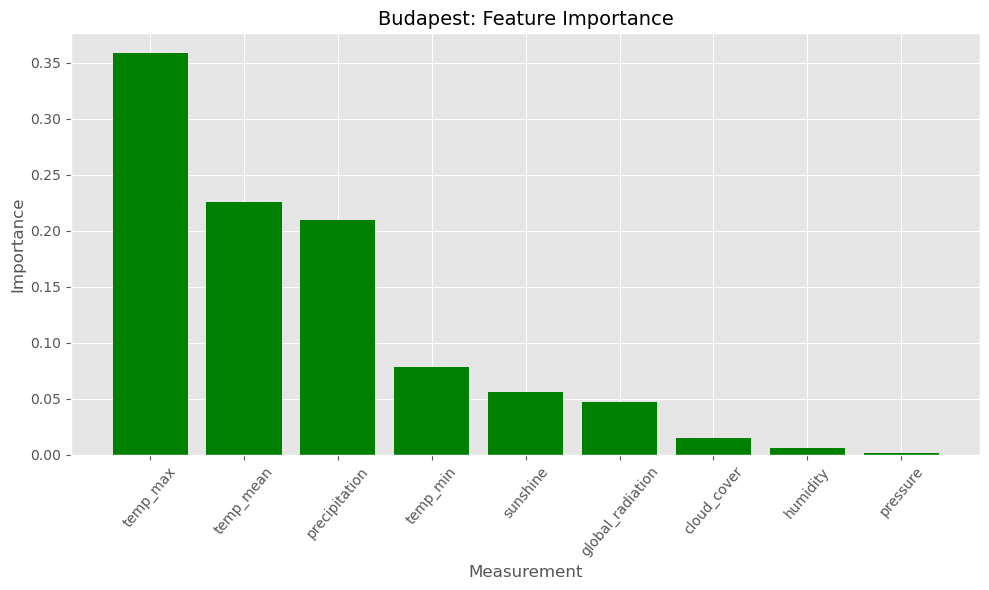

In [103]:
# Plot the importances

plt.style.use('ggplot')
plt_4 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_4['Measurement'], importances_df_4['Importance'], color='green')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Feature Importance", fontsize=14)
plt.tight_layout()
plt.show()

In [121]:
# Export Plot

plt_4.savefig(os.path.join(path, 'feature_importances_Budapest.png'),bbox_inches='tight')

> The most important indicators for **Budapest** are: **'temp_max', 'temp_mean', and 'precipitation'.**

### **Belgrade**

**Wrangling the data for Belgrade**

In [123]:
# Filter weather dataset to only include Budapest
df_belgrade = df[df.columns[df.columns.astype(str).str.startswith('BELGRADE')]]

# Check output
df_belgrade.head(1)

BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0                     1               0.81             1.0195   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                     0.0                7.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  
0                 3.7               -0.9                7.9

In [124]:
# Filter pleasant dataset to only include Belgrade
belgrade_pleasant = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('BELGRADE')]]

# Check output
belgrade_pleasant.head(1)

BELGRADE_pleasant_weather
0                          0

In [125]:
# Check shape
print(df_belgrade.shape)
print(belgrade_pleasant.shape)

(22950, 9)
(22950, 1)


In [126]:
# Create matrices
y_5 = belgrade_pleasant.max(axis=1)

# Check shape
print("Shape of y_5_combined:", y_5.shape)

Shape of y_5_combined: (22950,)


In [127]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_5_combined:", y_5.unique())

Unique values in y_5_combined: [0 1]


In [128]:
# Ensure y has the correct shape
y_5 = y_5.to_numpy().reshape(-1)

# Check shape
print(y_5.shape)

(22950,)


In [129]:
# Create X matrix
X_5 = df_belgrade.to_numpy()

# Check shapes of the matrices
print(X_5.shape)
print(y_5.shape)

(22950, 9)
(22950,)


In [130]:
# Split data into training and testing sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, random_state=843)

# Check shapes
print(X_train_5.shape, y_train_5.shape)
print(X_test_5.shape, y_test_5.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


**Creating a Random Forest for Belgrade**

In [131]:
# Creating a Random Forest classifier
clf_5 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_5.fit(X_train_5, y_train_5)

RandomForestClassifier(max_depth=3)

In [132]:
# Perform the predictions on the test dataset
y_pred_5 = clf_5.predict(X_test_5)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_5, y_pred_5))

Model Accuracy:  0.9963401882188916


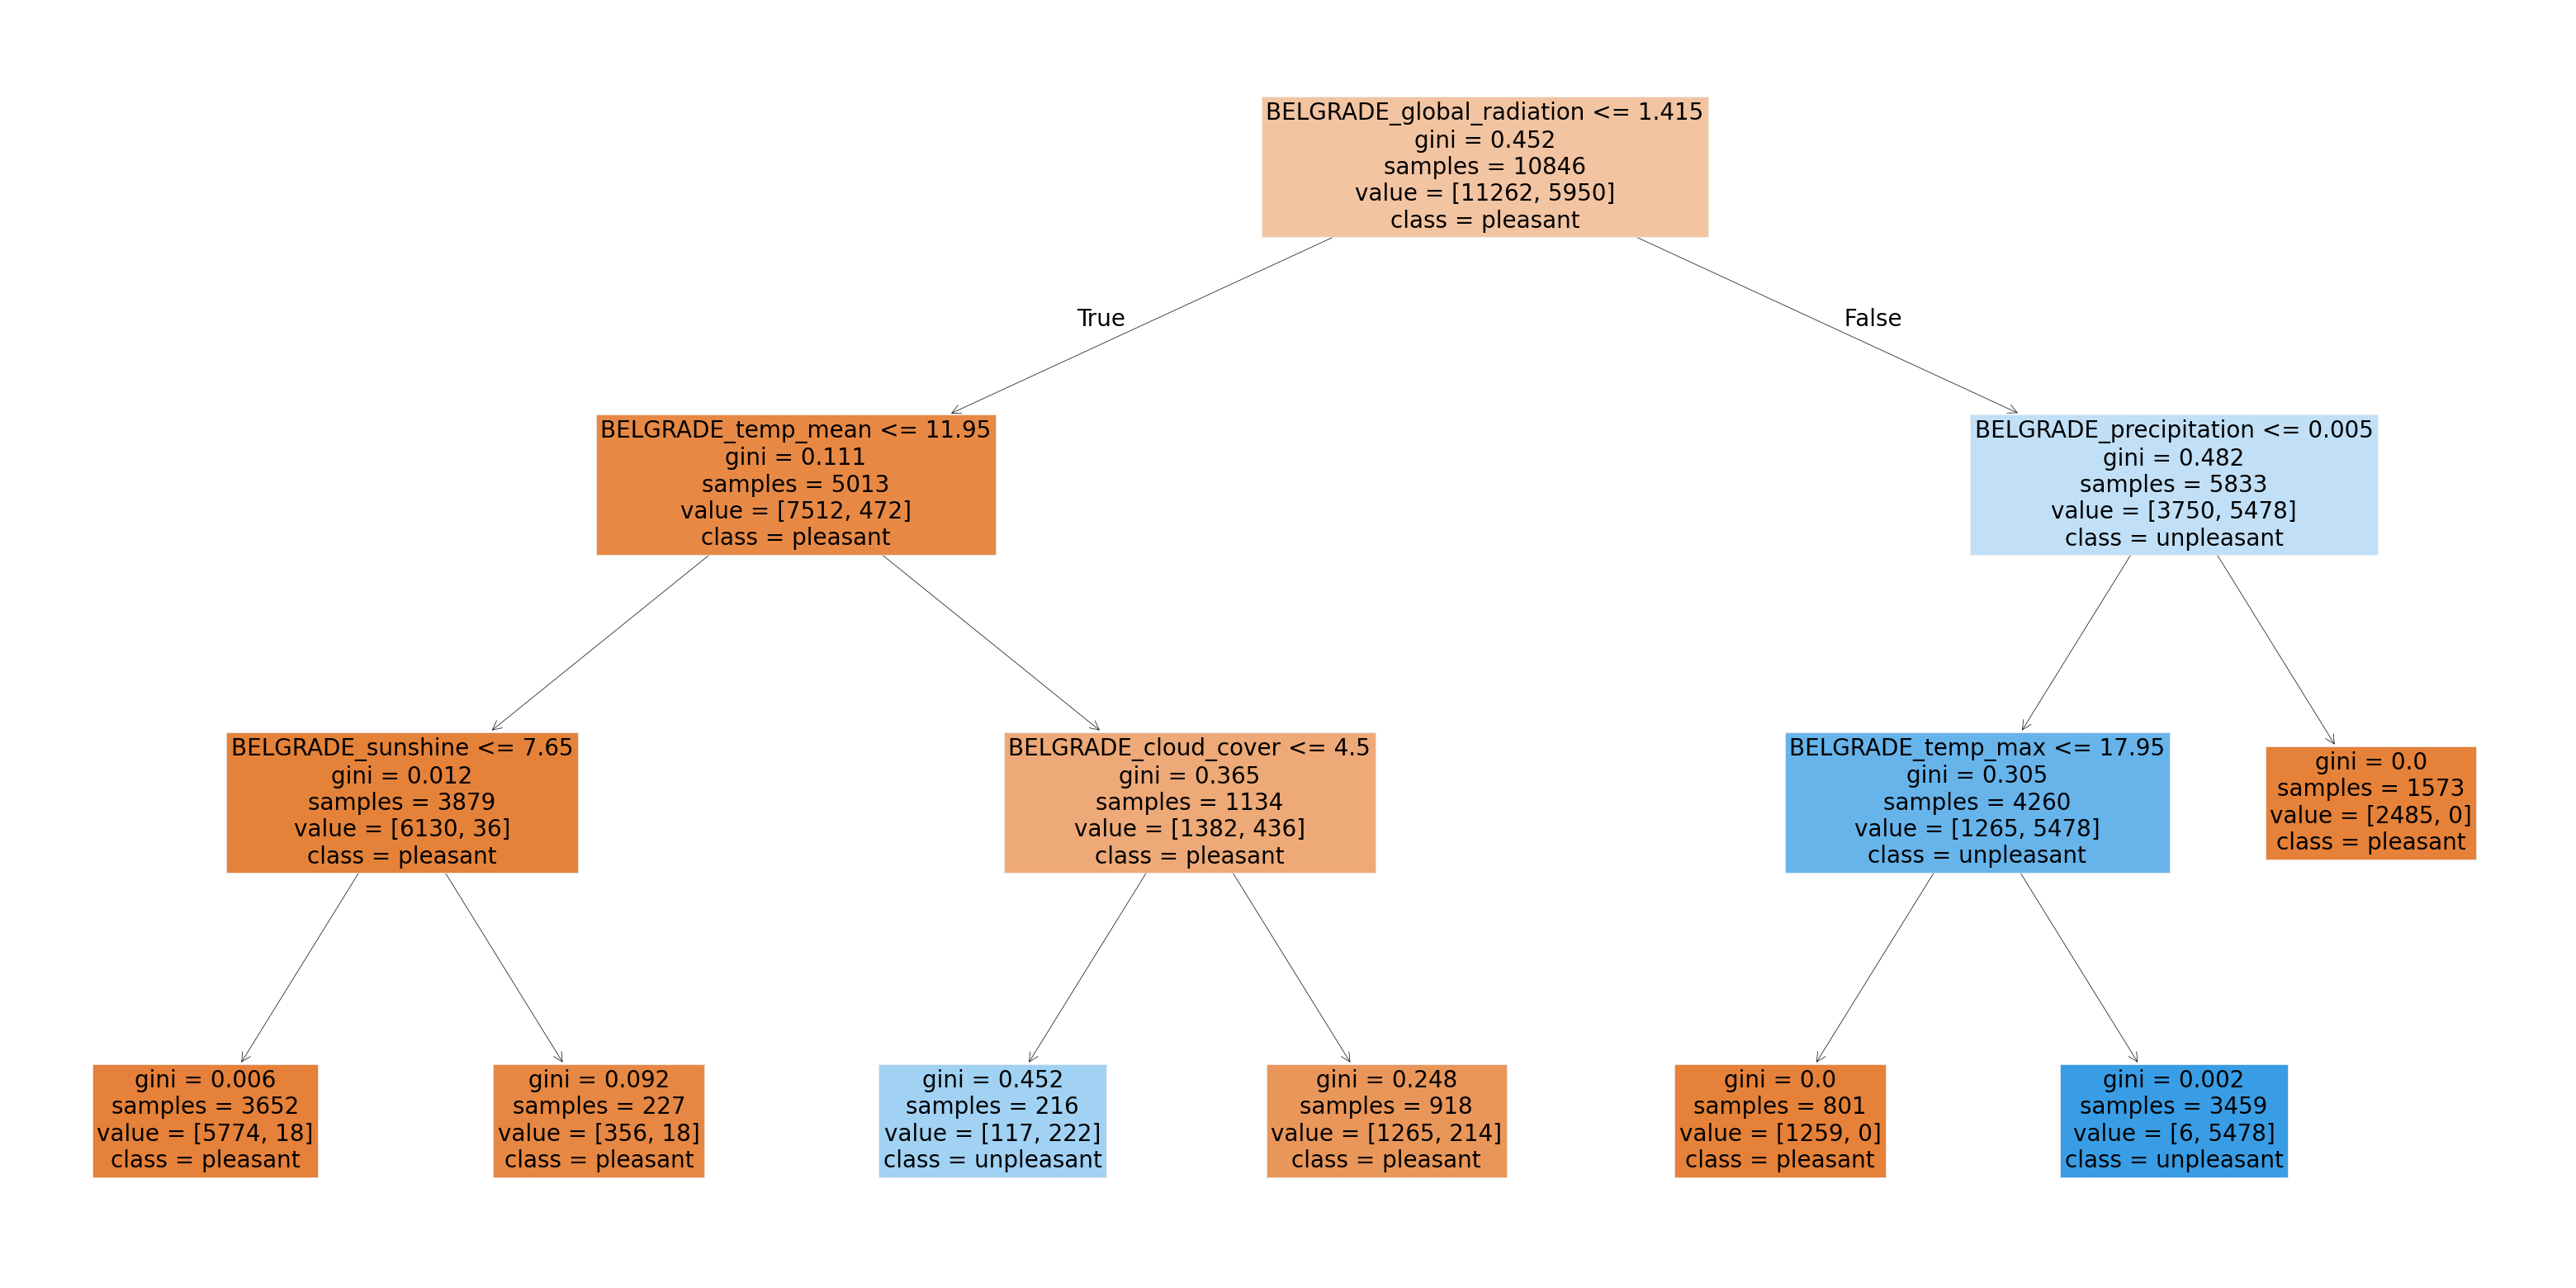

In [133]:
# Plot random forest (Belgrade) - estimator 5
rf_5 = plt.figure(figsize=(40,20))
plot_tree(clf_5.estimators_[5], fontsize = 20, feature_names=df_belgrade.columns, class_names=['pleasant', 'unpleasant'], filled=True)
plt.show();

In [134]:
# Export plot
rf_5.savefig(os.path.join(path, 'random_forest_belgrade.png'),bbox_inches='tight')

**Listing Feature Importances**

In [135]:
# Retrieve feature importances from the trained model
feature_importances_5 = clf_5.feature_importances_
print("Feature Importances:", feature_importances_5)
print(feature_importances_5.shape)

Feature Importances: [0.0419686  0.00720676 0.00591723 0.05665138 0.27286895 0.11140188
 0.22935134 0.02628339 0.24835046]
(9,)


In [136]:
# Create a dataframe to associate observation measurements with their importances
importances_df_5 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_5
})

In [137]:
# Sort by importance for chart readability
importances_df_5= importances_df_5.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_5)

Feature Importance:
        Measurement  Importance
4     precipitation    0.272869
8          temp_max    0.248350
6         temp_mean    0.229351
5          sunshine    0.111402
3  global_radiation    0.056651
0       cloud_cover    0.041969
7          temp_min    0.026283
1          humidity    0.007207
2          pressure    0.005917


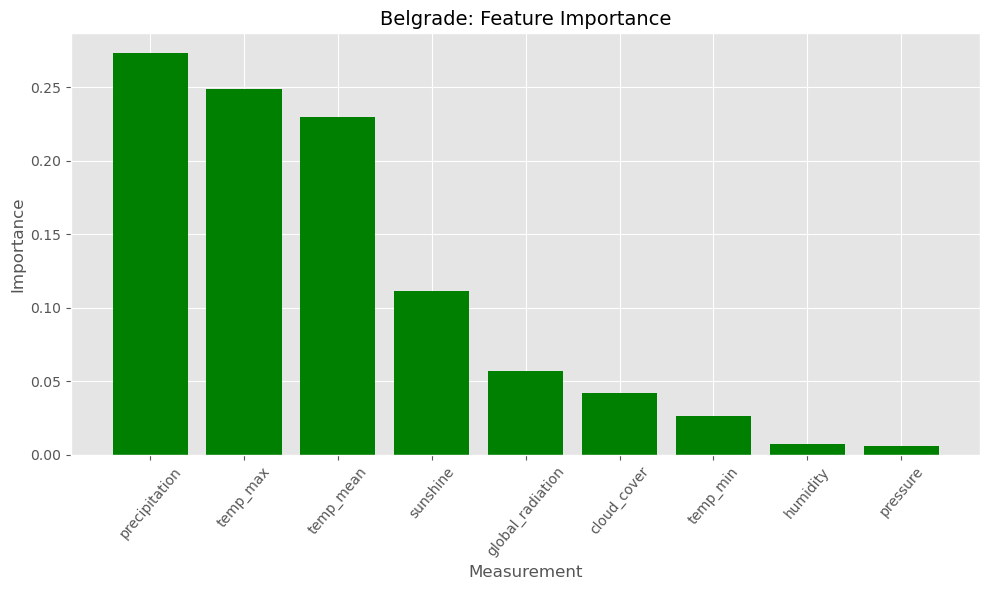

In [138]:
# Plot the importances

plt.style.use('ggplot')
plt_5 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_5['Measurement'], importances_df_5['Importance'], color='green')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Belgrade: Feature Importance", fontsize=14)
plt.tight_layout()
plt.show()

In [139]:
# Export Plot

plt_5.savefig(os.path.join(path, 'feature_importances_Belgrade.png'),bbox_inches='tight')

> The most important indicators for **Belgrade** are: **'precipitation', 'temp_max', and 'temp_mean**